In [77]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

#Extracting Data
path = "/content/drive/MyDrive/DryBean/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(path)

#Splitting data
x = df.iloc[:,0:-1].values
y = df.iloc[:, -1].values
y1 = np.reshape(y, (-1, 1))

Class Distribution

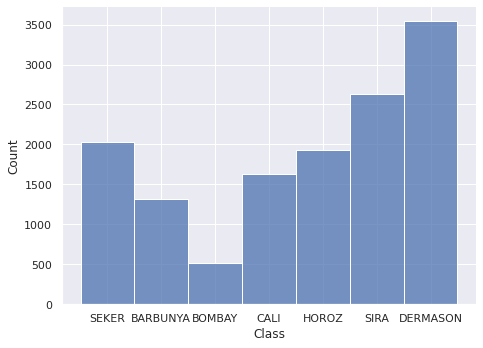

In [78]:
sns.displot(df["Class"], stat = "count", height = 5, aspect = 11/8)

Data Description

In [79]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


HeatMap

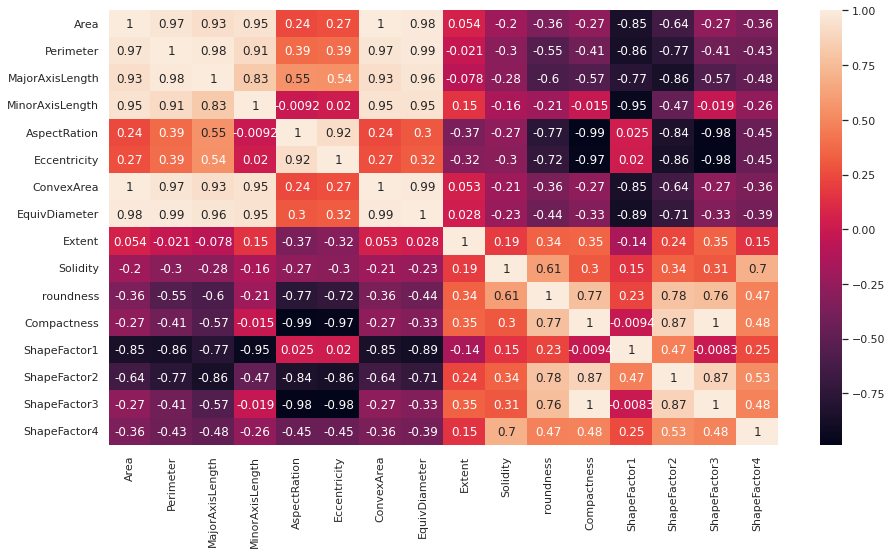

In [80]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot = True)

Pair Plot

In [ ]:
sns.pairplot(df, hue = "Class")

Scatter Plot

In [ ]:
sns.scatterplot(data = df, x = "ShapeFactor3", y = "Compactness", hue = "Class")

In [ ]:
sns.scatterplot(data = df, x = "AspectRation", y = "Compactness", hue = "Class")

Box Plot

In [ ]:
df.boxplot(figsize = (30,10))

Missing Values

In [ ]:
df.isnull().sum()

TSNE (t-distributed stochastic neighbor embedding)

In [ ]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, learning_rate = 'auto').fit_transform(x)

TSNE Scatter Plot

In [ ]:
x_tsne = np.concatenate((x_tsne, y1), axis = 1)
sns.scatterplot(data = x_tsne, x = x_tsne[:, 0], y = x_tsne[:, 1], hue = x_tsne[:, 2])

Two implementations of Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#Standard Scaling
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Paramters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))

In [ ]:
#Bernoulli Naive Bayes
mnb = BernoulliNB()
mnb.fit(x_train, y_train)

#Predicting output
y_predict = mnb.predict(x_test)

#Parameters
accuracy_scoreB = accuracy_score(y_test, y_predict)
recall_scoreB = recall_score(y_test, y_predict, average = "micro")
precision_scoreB = precision_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreB))
print("Recall Score is " + str(recall_scoreB))
print("Precision Score is " + str(precision_scoreB))

Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

#Number of components = 4
pca4 = PCA(n_components = 4)
x_pca4 = pca4.fit_transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x_pca4, y, test_size=0.2, random_state=0)

#Using Gaussian Naive Bayes for PCA than Bernoulli Naive Bayes, because we wanted to compare accuracy and other parameters with the Naive Bayes implementation that is already working better than others
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Parameters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")
f1_scoreG = f1_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))
print("F1 - score is " + str(f1_scoreG))

In [ ]:
#Number of components = 6
pca6 = PCA(n_components = 6)
x_pca6 = pca6.fit_transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x_pca6, y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Parameters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")
f1_scoreG = f1_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))
print("F1 - score is " + str(f1_scoreG))

In [ ]:
#Number of components = 8
pca8 = PCA(n_components = 8)
x_pca8 = pca8.fit_transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x_pca8, y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Parameters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")
f1_scoreG = f1_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))
print("F1 - score is " + str(f1_scoreG))

In [ ]:
#Number of components = 10
pca10 = PCA(n_components = 10)
x_pca10 = pca10.fit_transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x_pca10, y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Parameters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")
f1_scoreG = f1_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))
print("F1 - score is " + str(f1_scoreG))

In [ ]:
#Number of components = 12
pca12 = PCA(n_components = 12)
x_pca12 = pca12.fit_transform(x)

#Splitting the train and test data (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x_pca12, y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output
y_predict = clf.predict(x_test)

#Parameters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")
f1_scoreG = f1_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))
print("F1 - score is " + str(f1_scoreG))

ROC-AUC curves

In [ ]:
from sklearn.preprocessing import LabelBinarizer
dif_class = df["Class"].unique()

#Doing it for number of components = 8, because accuracy is highest in that
pca8 = PCA(n_components = 8)
x_pca8 = pca8.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pca8, y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predicting output probability
y_predict = clf.predict_proba(x_test)

y2 = np.reshape(y_test, (-1, 1))
y2 = LabelBinarizer().fit_transform(y2)
for i in range (0, len(dif_class)):
  #ROC Curve columns
  fpr, tpr, thresholds = roc_curve(y2[:,i], y_predict[:,i])
  #Getting auc score
  auc_score = roc_auc_score(y2[:,i], y_predict[:,i])
  plt.plot(fpr, tpr, label = dif_class[i] + " with AUC score: " + str(round(auc_score, 4)))

#Plotting ROC-AUC curve
plt.xlabel("False positive Rate (fpr)")
plt.ylabel("True positive Rate (tpr)")
plt.legend()
plt.title("ROC-AUC Curve")
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Copy of the original data
df1 = df.copy()

#Removing Redundancy
df1.drop(["ConvexArea", "Eccentricity", "Area", "Compactness", "MinorAxisLength", "AspectRation"], inplace = True, axis = 1)
model = LogisticRegression(max_iter = 850)

#Splitting the data
x_split = df1.iloc[:,0:-1]
y_split = df1.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(x_split)
x2 = scaler.transform(x_split)

#Splitting training and testing part (80:20) split
x_train, x_test, y_train, y_test = train_test_split(x2, y_split, test_size=0.2, random_state=0)
model.fit(x_train, y_train)

#Predicting output
y_predict = model.predict(x_test)

#Paramters
accuracy_scoreG = accuracy_score(y_test, y_predict)
recall_scoreG = recall_score(y_test, y_predict, average = "micro")
precision_scoreG = precision_score(y_test, y_predict, average = "micro")

print("Accuracy Score is " + str(accuracy_scoreG))
print("Recall Score is " + str(recall_scoreG))
print("Precision Score is " + str(precision_scoreG))